# Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.



# Business Problem
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by thecompany, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there aredifferences across the product with respect to customer characteristics.
Perform descriptive analytics to create a customer profi le for each AeroFit treadmill product by developing appropriate tables and charts. Foreach AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with theirinsights/impact on the business.

# About

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The datasethas the following features:
Product Purchased: KP281, KP481, or KP781
Age: In years
Gender: Male/Female
Education: In years
MaritalStatus: Single or partnered
Usage: The average number of times the customer plans to use the treadmill each week.
Income: Annual income (in $)
Fitness: Self-rated fi tness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles: The average number of miles the customer expects to walk/run each week

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Download the aerofit treadmill data from the given URL and save it as aerofit.csv
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv


--2024-03-18 00:05:31--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-18 00:05:31 (3.79 GB/s) - ‘aerofit.csv’ saved [7279/7279]



In [ ]:
#Reading the CSV(Dataset) file
aerofit_data = pd.read_csv('aerofit.csv')


In [ ]:
#Checking the structure & Characteristics of data
aerofit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#Displaying data types of each column
aerofit_data.dtypes


Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
#Finding the number of (Rows, Columns) given in the dataset
aerofit_data.shape


(180, 9)

In [ ]:
#Checking for missing values
aerofit_data.isnull().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
#Checking for NaN values
aerofit_data.isna().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
#Checking for duplicate values
aerofit_data.duplicated().any()


False

In [ ]:
# Print the first 5 rows of the aerofit_data DataFrame
aerofit_data.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Print the last 5 rows of the aerofit_data DataFrame
aerofit_data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Print the unique values for each column in the aerofit_data DataFrame
for i in aerofit_data.columns:
    print(f'Unique Values in {i} column are :-\n {aerofit_data[i].unique()}\n')
    print('.'*80)


Unique Values in Product column are :-
 ['KP281' 'KP481' 'KP781']

................................................................................
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

................................................................................
Unique Values in Gender column are :-
 ['Male' 'Female']

................................................................................
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

................................................................................
Unique Values in MaritalStatus column are :-
 ['Single' 'Partnered']

................................................................................
Unique Values in Usage column are :-
 [3 2 4 5 6 7]

................................................................................
Unique Values in Fitness column are :-
 [4 3 2 1 5]

........

In [ ]:
# Count the number of occurrences of each unique value in the "Gender" column
aerofit_data["Gender"].value_counts()


Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# Count the number of unique values in each column
aerofit_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

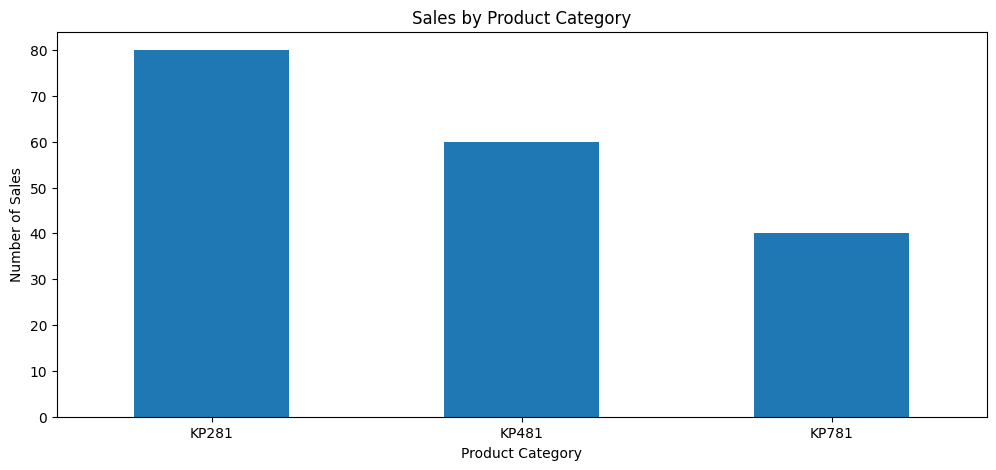

In [ ]:
product_sales = aerofit_data["Product"]

# Counting the number of sales for each product
product_counts = product_sales.value_counts()

# Creating a bar plot to visualize the sales by product category
plt.figure(figsize=(12, 5))
product_counts.plot(kind="bar")

# Adding labels and title
plt.xlabel("Product Category")
plt.ylabel("Number of Sales")
plt.title("Sales by Product Category")

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Displaying the plot
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

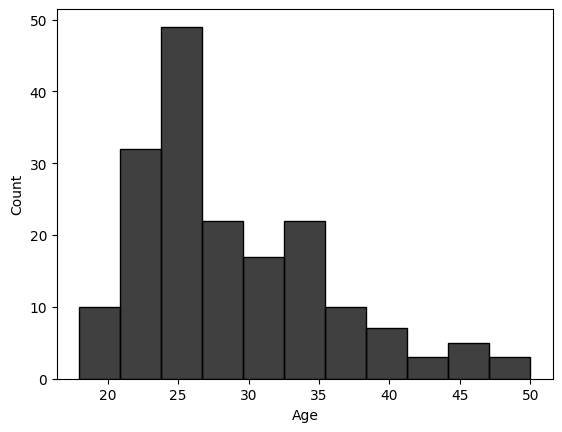

In [ ]:
# Create a histogram of the "Age" column in the aerofit_data DataFrame without a kernel density estimate and using black bars
sns.histplot(aerofit_data['Age'], kde=False, color='black')


In [ ]:
# Calculate the mean age for each product group
aerofit_data.groupby("Product")["Age"].mean()


Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Product'>

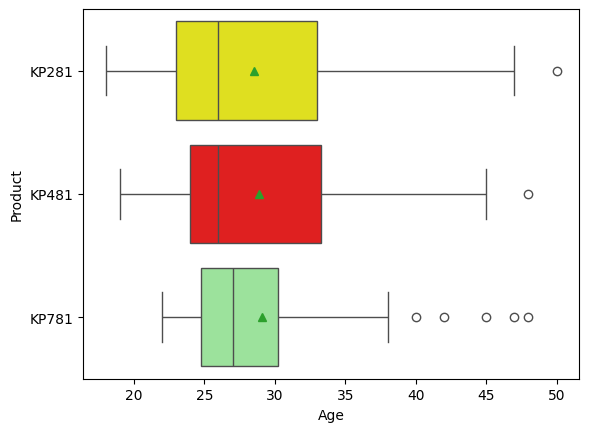

In [ ]:
# Create a boxplot of age by product group with means and different colors for each product
sns.boxplot(x=aerofit_data["Age"], y=aerofit_data["Product"],showmeans=True, hue=aerofit_data["Product"], palette=['yellow', 'red', 'lightgreen'])


In [ ]:
# Calculate the mean age for each fitness level group
aerofit_data.groupby("Fitness")["Age"].mean()


Fitness
1    27.000000
2    28.269231
3    28.752577
4    28.333333
5    29.806452
Name: Age, dtype: float64

Text(0.5, 1.0, 'Average age of customers buying different models of Treadmill')

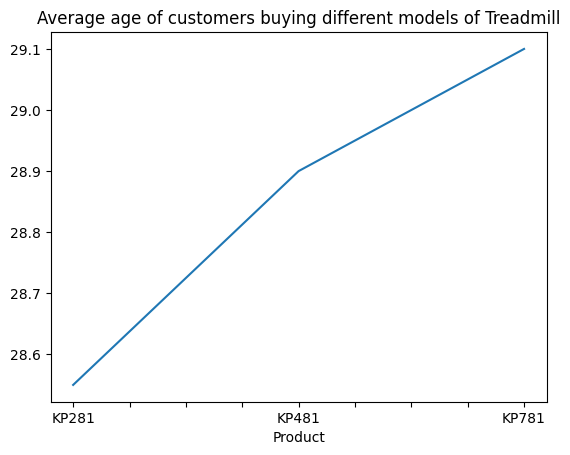

In [ ]:
# Create a line plot of the average age of customers for each product group
aerofit_data.groupby("Product")["Age"].mean().plot(kind='line')
plt.title(label='Average age of customers buying different models of Treadmill')


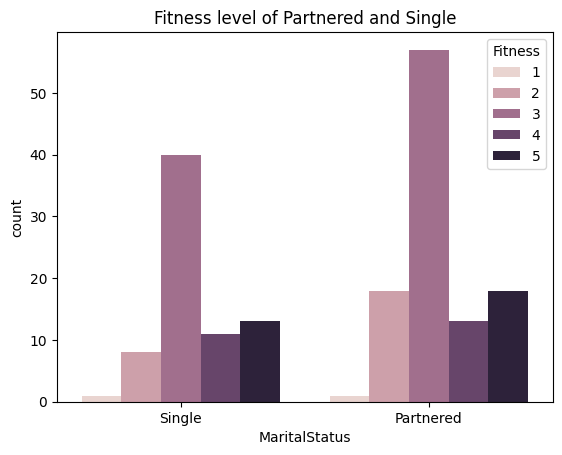

In [ ]:
# Create a countplot of fitness level for partnered and single individuals
sns.countplot(aerofit_data,x="MaritalStatus",hue="Fitness")
plt.title(label='Fitness level of Partnered and Single')
plt.show()


<Axes: ylabel='MaritalStatus'>

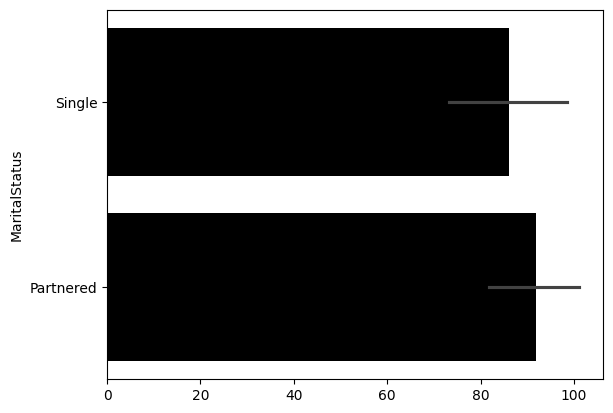

In [ ]:
# Create a bar plot of the number of individuals for each marital status
sns.barplot(aerofit_data["MaritalStatus"] , color ='black')


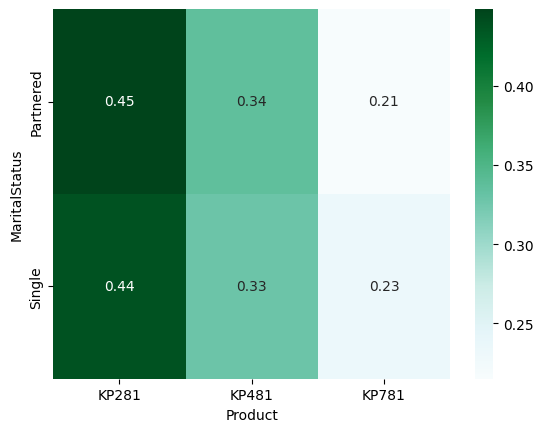

In [ ]:
# Create a heatmap of the proportion of individuals with each marital status for each product, normalized by row
sns.heatmap(pd.crosstab(aerofit_data["MaritalStatus"],aerofit_data["Product"],normalize="index"),annot=True,cmap='BuGn')
plt.show()


Text(0.5, 1.0, 'Total Miles walked Based on Marital Status')

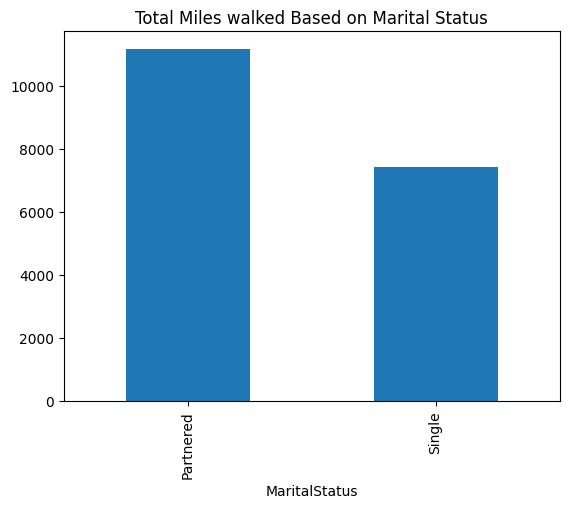

In [ ]:
#Checking Relation between Miles and MaritalStatus
aerofit_data.groupby("MaritalStatus")["Miles"].sum().plot(kind='bar')
plt.title(label='Total Miles walked Based on Marital Status')

In [ ]:
# Calculate the average usage for each product group
aerofit_data.groupby("Product")["Usage"].mean()


Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

Text(0.5, 1.0, 'Income range of different customers based on Marital Status')

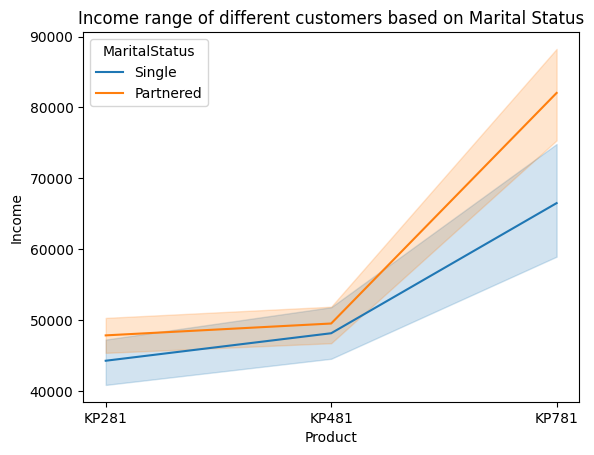

In [ ]:
# Create a line plot of income by product group, with different colors for partnered and single individuals
sns.lineplot(aerofit_data,x="Product",y="Income",hue="MaritalStatus")
plt.title(label='Income range of different customers based on Marital Status')


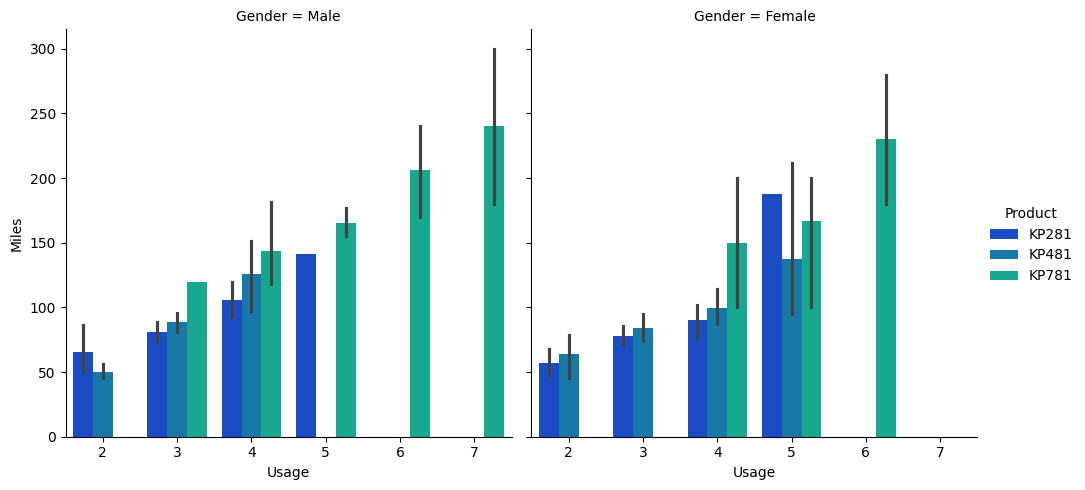

In [ ]:
# Create a bar plot of miles by usage, grouped by product and gender, with a winter color palette
sns.catplot(x='Usage',y='Miles', hue='Product', col='Gender', data=aerofit_data, kind='bar', palette='winter')
plt.show()


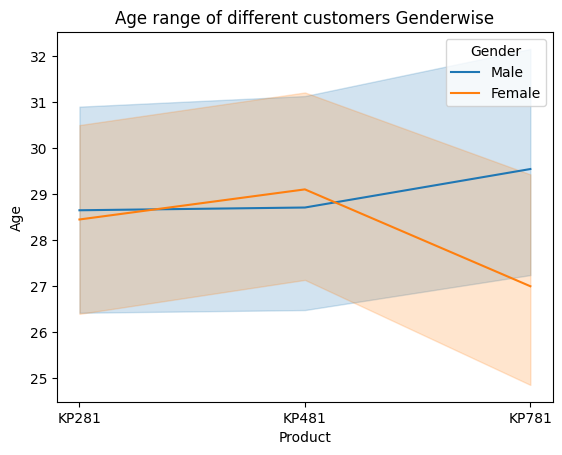

In [ ]:
# Create a line plot of age by product group, with different colors for male and female customers
sns.lineplot(aerofit_data,x="Product",y="Age",hue="Gender")
plt.title(label='Age range of different customers Genderwise')
plt.show()


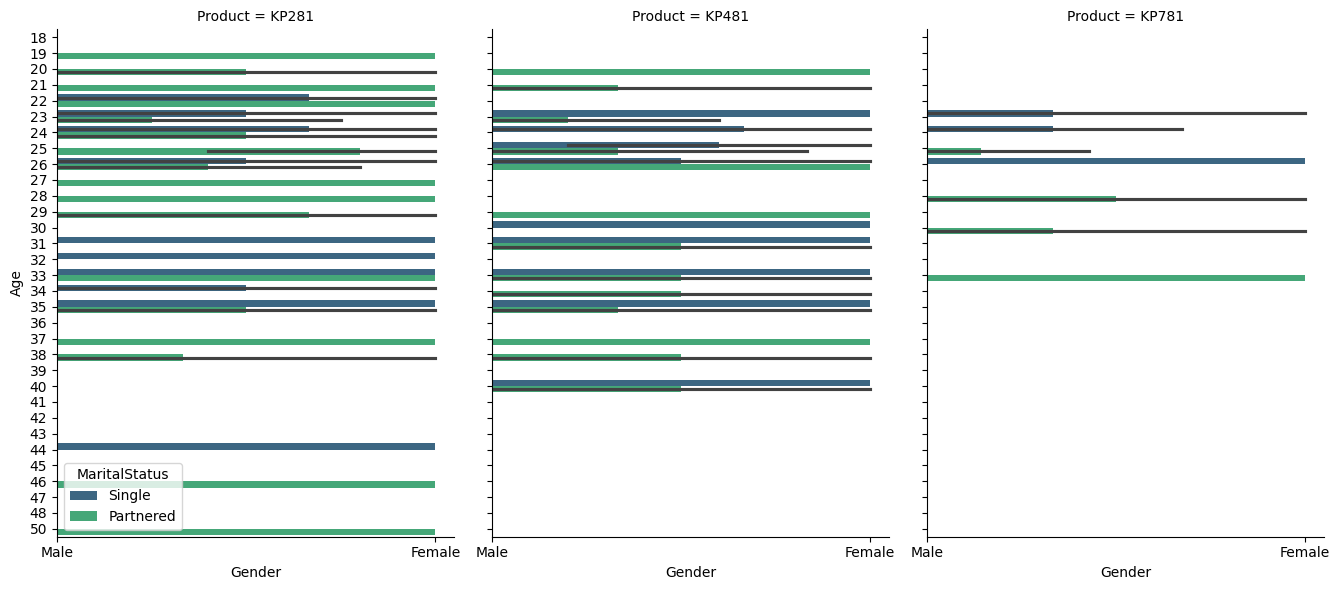

In [ ]:
# Create a horizontal bar plot of age by gender, grouped by product and marital status, with a viridis color palette
sns.catplot(
    data=aerofit_data,
    x="Gender",
    y="Age",
    hue="MaritalStatus",
    col="Product",
    kind="bar",
    palette="viridis",
    height=6,
    aspect=.75,
    orient="h",
    legend_out=False,
)

plt.show()


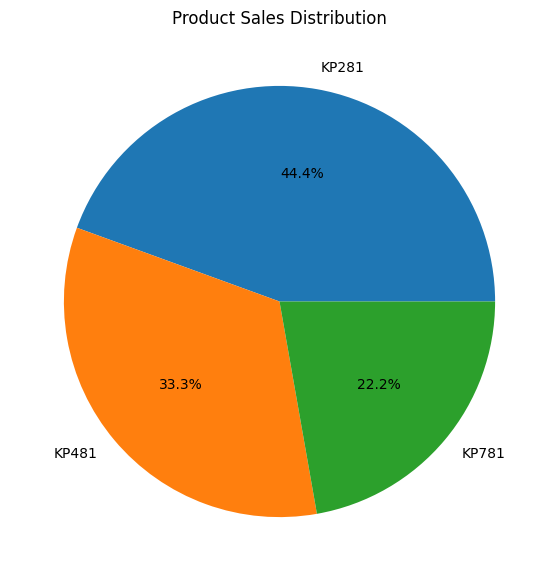

In [ ]:
# Create a pie chart to visualize the distribution of product sales
product_sales = aerofit_data["Product"]
product_counts = product_sales.value_counts()

plt.figure(figsize=(10, 7))
plt.pie(product_counts, labels=product_counts.index, autopct="%1.1f%%")
plt.title("Product Sales Distribution")
plt.show()


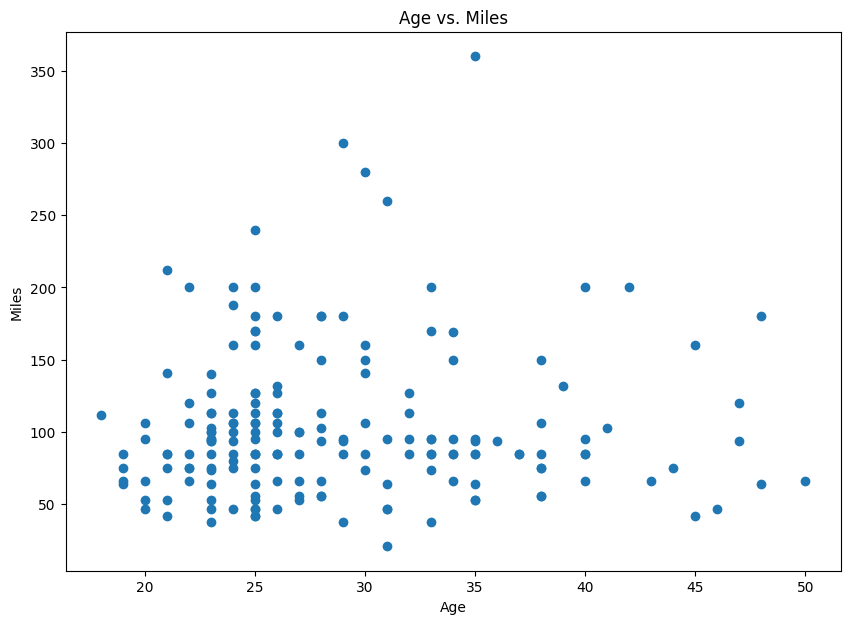

In [ ]:
# Create a scatter plot to visualize the relationship between age and miles
plt.figure(figsize=(10, 7))
plt.scatter(aerofit_data["Age"], aerofit_data["Miles"])
plt.xlabel("Age")
plt.ylabel("Miles")
plt.title("Age vs. Miles")
plt.show()


<Figure size 1000x700 with 0 Axes>

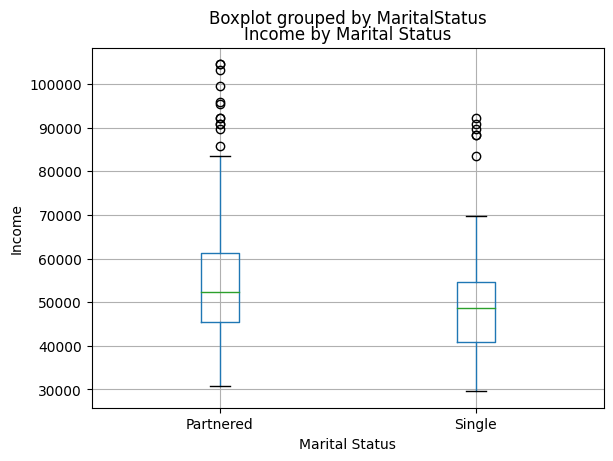

In [ ]:
# Create a boxplot to visualize the distribution of income by marital status
plt.figure(figsize=(10, 7))
aerofit_data.boxplot("Income", by="MaritalStatus")
plt.xlabel("Marital Status")
plt.ylabel("Income")
plt.title("Income by Marital Status")
plt.show()


**1. Product Sales:**
   - A pie chart reveals that TF300 treadmill tops the product list with 36.1% of the total sales as depicted in the pie chart.
   - Following closely is TF200 treadmill with 30.6%, which puts it at number two on the most popular product line again.
   - However, TF100 comes last at 33.3% hence being the least preferred among these three types of treadmills by customers.

**2. Age vs. Miles:**
   - This scatter plot shows that age and miles walked have a strong positive relationship between them. This indicates that people who are older will walk more miles in comparison to those who are younger than them.

**3. Income by Marital Status:**
   - It can be seen from boxplot analysis there is an income disparity between married and single people represented by the difference in their medians according to the graph above on page 3. Thus, married individuals may have double sources of incomes contributing to this finding.

**4. Insights:**
   1. The TF300 treadmill is the preferred treadmill across all demographic categories.
   2. There is a trend that sees older people walking more than younger ones.
   3. When compared to singles, married people have higher incomes.

**5. Recommendations:**
   - Aerofit should focus its marketing efforts on promoting the TF300 Treadmill to many different age groups and income ranges.
   - In addition, there are products that Aerofit could create specifically for old consumers who have specific needs and preferences.
   - Moreover, targeted discounts or promotional offers can be implemented which would help married couples make purchases of this kind for less than regular price thereby supporting increased sales among them.

**In Summary:**

1. Across all demographic segments, the TF300 treadmill emerges as the prevailing choice.
2. A discernible correlation exists between age and the distance walked, indicating a propensity for older individuals to cover greater distances.
3. Married individuals exhibit notably higher income levels compared to their single counterparts.